<a href="https://colab.research.google.com/github/ElielLucas/Estudos/blob/main/DataScience/Desafio_DadosClimaticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio Ciência de Dados - Clima

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy
import random
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_clima = pd.read_csv("/content/dfdados.csv")

# AED

In [ ]:
df_clima = df_clima.drop(columns=['Unnamed: 0'])

In [ ]:
df_clima.head()

,cidade,sg_estado,nme_estado,dta_medicao,hr_medicao,ano,mes,dia,pre_ins,pre_max,...,ven_dir,chuva,pre_min,umd_max,ven_vel,pto_min,tem_max,ven_raj,tem_ins,umd_ins
0,GOIANIA,GO,Goiás,2001-05-30,12:00:00,2001,5,30,936.6,936.6,...,149,0.0,936.2,92,1.2,17.6,22.0,2.6,22.0,79
1,GOIANIA,GO,Goiás,2001-05-30,13:00:00,2001,5,30,936.6,936.8,...,143,0.0,936.6,79,1.5,17.9,25.2,3.3,25.1,69
2,GOIANIA,GO,Goiás,2001-05-30,14:00:00,2001,5,30,936.4,936.7,...,89,0.0,936.4,70,3.9,16.6,28.2,6.7,28.0,50
3,GOIANIA,GO,Goiás,2001-05-30,15:00:00,2001,5,30,935.7,936.4,...,74,0.0,935.7,52,2.7,16.3,29.3,6.3,29.2,48
4,GOIANIA,GO,Goiás,2001-05-30,16:00:00,2001,5,30,934.8,935.7,...,93,0.0,934.8,51,2.6,16.3,29.7,5.1,28.4,51


In [ ]:
df_clima["temp_med_diaria"] =  (df_clima["tem_min"] + df_clima["tem_max"]  + df_clima["tem_ins"] )/3
df_clima["dif_temp_diaria"] =  df_clima["tem_max"] - df_clima["tem_min"]
df_clima["umd_media_diaria"] = (df_clima["umd_min"] + df_clima["umd_max"]  + df_clima["umd_ins"] )/3
df_clima["dif_umd_diaria"] =  df_clima["umd_max"] - df_clima["umd_min"]
df_clima

,cidade,sg_estado,nme_estado,dta_medicao,hr_medicao,ano,mes,dia,pre_ins,pre_max,...,ven_vel,pto_min,tem_max,ven_raj,tem_ins,umd_ins,temp_med_diaria,dif_temp_diaria,umd_media_diaria,dif_umd_diaria
0,GOIANIA,GO,Goiás,2001-05-30,12:00:00,2001,5,30,936.6,936.6,...,1.2,17.6,22.0,2.6,22.0,79,20.966667,3.1,83.000000,14
1,GOIANIA,GO,Goiás,2001-05-30,13:00:00,2001,5,30,936.6,936.8,...,1.5,17.9,25.2,3.3,25.1,69,24.100000,3.2,72.000000,11
2,GOIANIA,GO,Goiás,2001-05-30,14:00:00,2001,5,30,936.4,936.7,...,3.9,16.6,28.2,6.7,28.0,50,27.100000,3.1,56.666667,20
3,GOIANIA,GO,Goiás,2001-05-30,15:00:00,2001,5,30,935.7,936.4,...,2.7,16.3,29.3,6.3,29.2,48,28.833333,1.3,48.666667,6
4,GOIANIA,GO,Goiás,2001-05-30,16:00:00,2001,5,30,934.8,935.7,...,2.6,16.3,29.7,5.1,28.4,51,28.833333,1.3,49.333333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180487,GOIANIA,GO,Goiás,2021-12-31,19:00:00,2021,12,31,925.9,926.0,...,2.2,17.4,24.8,10.1,20.2,89,21.666667,4.8,85.333333,11
180488,GOIANIA,GO,Goiás,2021-12-31,20:00:00,2021,12,31,925.0,925.9,...,1.1,18.1,23.6,10.1,23.6,85,22.400000,3.6,86.333333,8
180489,GOIANIA,GO,Goiás,2021-12-31,21:00:00,2021,12,31,925.2,925.2,...,1.2,20.0,24.1,1.4,23.6,82,23.766667,0.5,82.333333,7
180490,GOIANIA,GO,Goiás,2021-12-31,22:00:00,2021,12,31,926.0,926.1,...,0.8,20.1,23.7,3.3,22.7,85,22.900000,1.4,85.000000,8


In [ ]:
df_clima.columns

Index(['cidade', 'sg_estado', 'nme_estado', 'dta_medicao', 'hr_medicao', 'ano',
       'mes', 'dia', 'pre_ins', 'pre_max', 'rad_glo', 'pto_ins', 'tem_min',
       'umd_min', 'pto_max', 'ven_dir', 'chuva', 'pre_min', 'umd_max',
       'ven_vel', 'pto_min', 'tem_max', 'ven_raj', 'tem_ins', 'umd_ins',
       'temp_med_diaria', 'dif_temp_diaria', 'umd_media_diaria',
       'dif_umd_diaria'],
      dtype='object')

### Cidade e estado das medições

In [ ]:
df_clima["cidade"].unique(), df_clima["sg_estado"].unique(), df_clima["nme_estado"].unique()

(array(['GOIANIA'], dtype=object),
 array(['GO'], dtype=object),
 array(['Goiás'], dtype=object))

In [ ]:
df_clima["hr_medicao"].unique()

array(['12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00',
       '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00',
       '22:00:00', '23:00:00', '00:00:00', '01:00:00', '02:00:00',
       '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00',
       '08:00:00', '09:00:00', '10:00:00', '11:00:00'], dtype=object)

In [ ]:
len(df_clima["dta_medicao"].unique()), df_clima["dta_medicao"].count()

(7521, 180492)

In [ ]:
# for i in df_clima.ano:
#   for j in df_clima.mes:


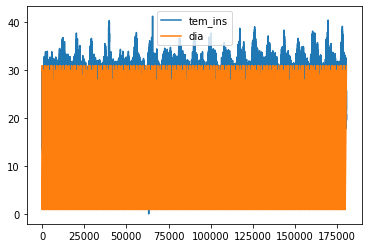

In [ ]:
df_clima[["tem_ins", "dia"]].plot()

In [ ]:
len(df_clima)

180492

In [ ]:
len(df_clima["dta_medicao"].unique())

7521

In [ ]:
df_clima["nme_estado"].unique()

array(['Goiás'], dtype=object)

In [ ]:
df_clima["ano"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df_clima.loc[df_clima.ano.isna()]

,cidade,sg_estado,nme_estado,dta_medicao,hr_medicao,ano,mes,dia,pre_ins,pre_max,...,ven_vel,pto_min,tem_max,ven_raj,tem_ins,umd_ins,temp_med_diaria,dif_temp_diaria,umd_media_diaria,dif_umd_diaria


In [ ]:
7521/365

20.605479452054794

In [ ]:
df_clima["temp_med_diaria"] = (df_clima["tem_min"] + df_clima["tem_max"] + df_clima["tem_ins"])/3
# df_clima["d"]
# e dif- temp_diaria =  tem_max – tem_min; umd_média_diária = média diária(umd_max, umd_min, umd_ins), dif_umd_diária =  umd_max- umd_min
# df_clima

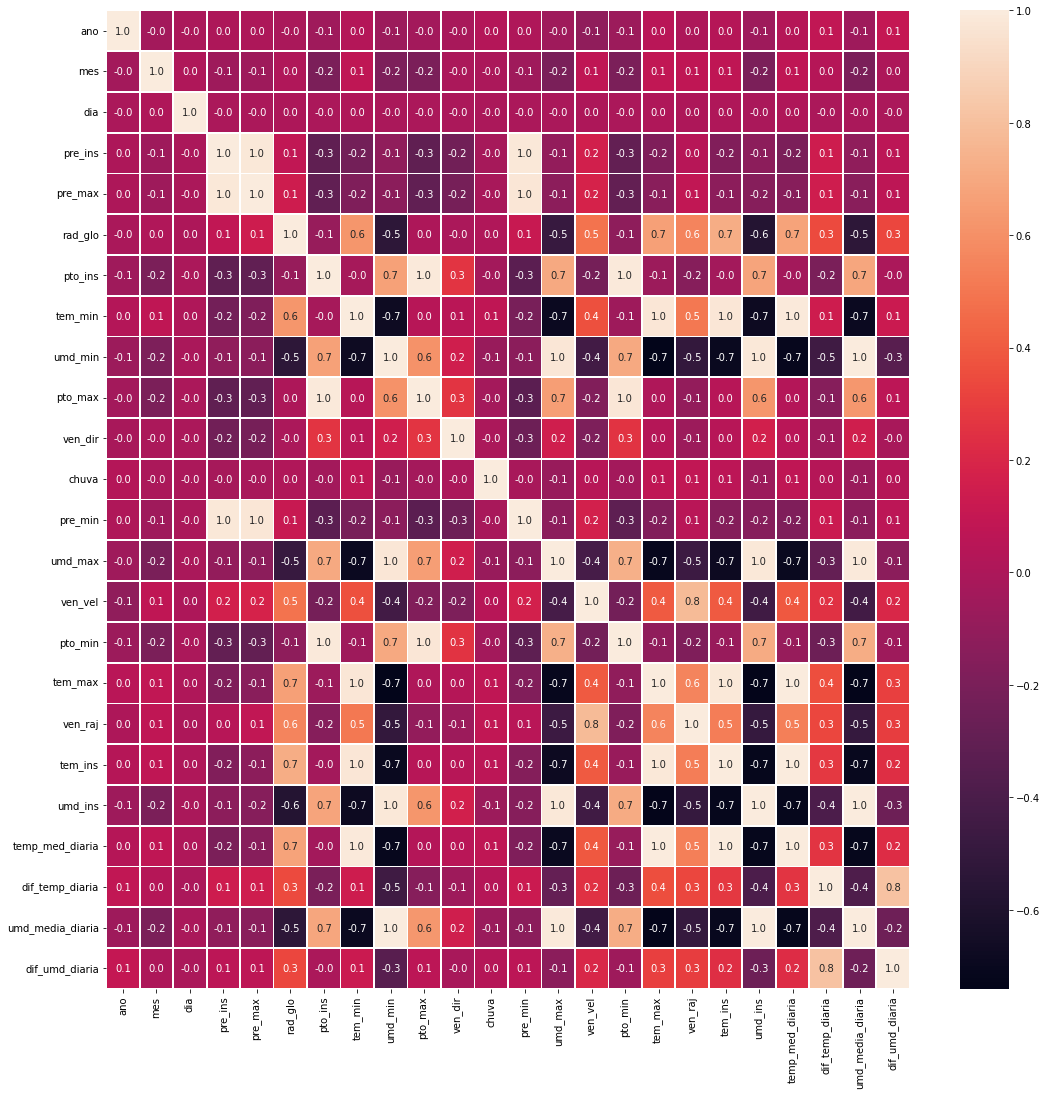

In [ ]:
correlation = df_clima.corr()
plt.figure(figsize=(18, 18))
plot = sn.heatmap(correlation, annot = True, fmt = ".1f", linewidths = .8)
plot

In [ ]:
train, test = train_test_split(df_clima, test_size=0.05, random_state = 20)

**Temperatura média diária X Temperatura máxima**
*   **Coeficiente de Correlação = 1 (Forte Correlação)**


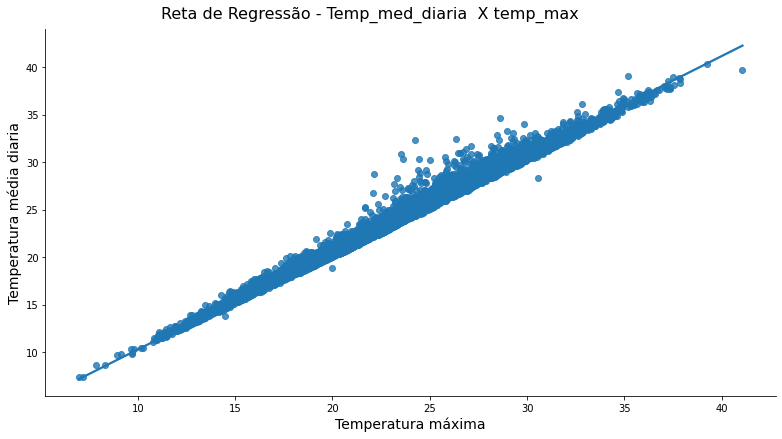

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="tem_max", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X temp_max', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura máxima", fontsize=14)
ax.set_ylabels("Temperatura média diaria", fontsize=14)
ax

**Temperatura média diária X Temperatura mínima**
*   **Coeficiente de Correlação = 1 (Forte Correlação)**

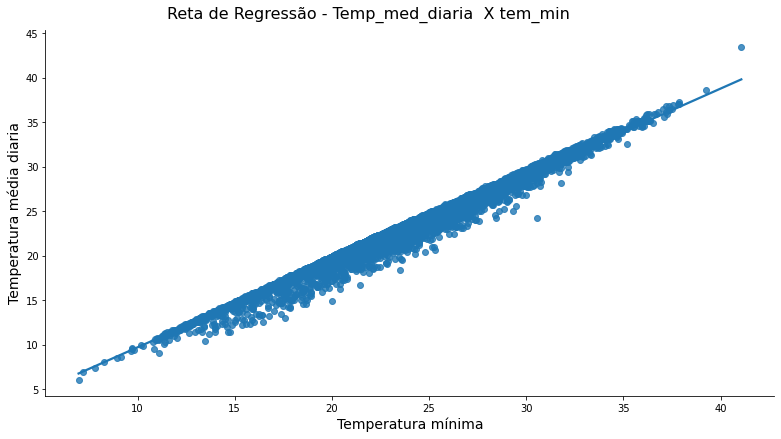

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="tem_min", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X tem_min', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura mínima", fontsize=14)
ax.set_ylabels("Temperatura média diaria", fontsize=14)
ax

**Temperatura média diária X Temperatura instantânea**
*   **Coeficiente de Correlação = 1 (Forte Correlação)**

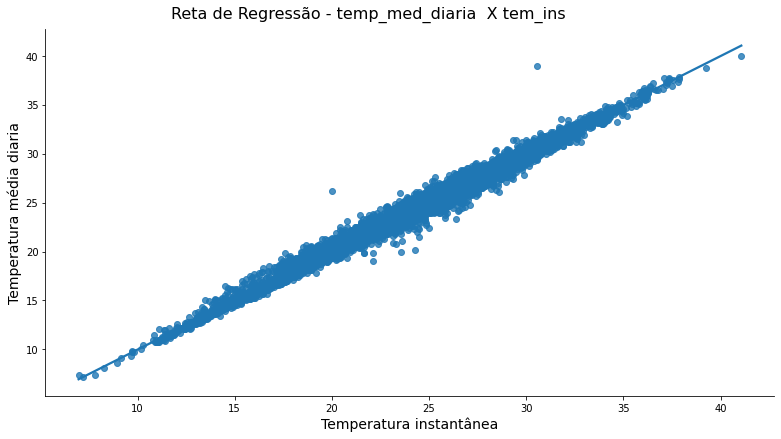

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="tem_ins", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - temp_med_diaria  X tem_ins', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura instantânea", fontsize=14)
ax.set_ylabels("Temperatura média diaria", fontsize=14)
ax

**Temperatura média diária X Radiação Solar**
*   **Coeficiente de Correlação = 0.7 (Forte Correlação)**

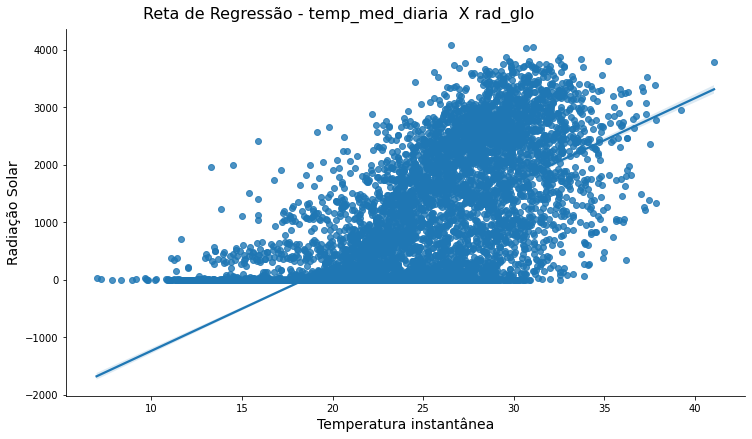

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="rad_glo", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - temp_med_diaria  X rad_glo', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura instantânea", fontsize=14)
ax.set_ylabels("Radiação Solar", fontsize=14)
ax

**Temperatura média diária X Umidade Mínima**
*   **Coeficiente de Correlação = -0.7 (Forte Correlação - Inversamente Proporsional)**

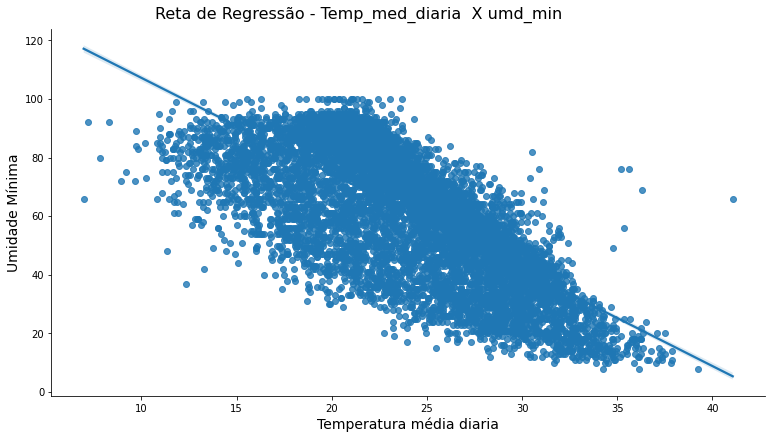

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="umd_min", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X umd_min', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média diaria", fontsize=14)
ax.set_ylabels("Umidade Mínima", fontsize=14)
ax

**Temperatura média diária X Umidade Máxima**
*   **Coeficiente de Correlação = -0.7 (Forte Correlação - Inversamente Proporsional)**

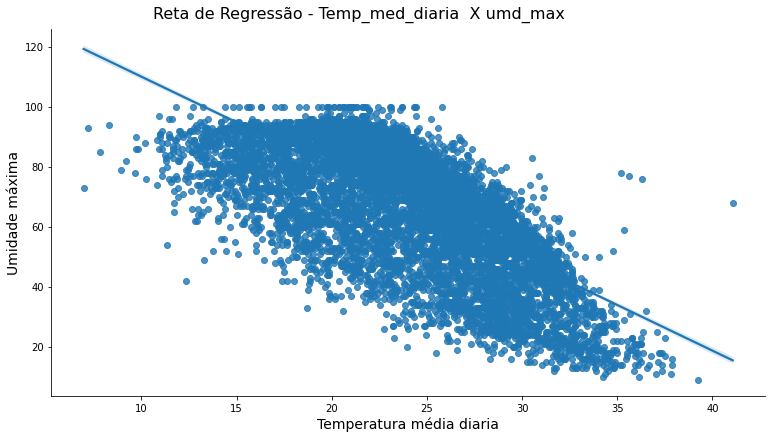

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="umd_max", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X umd_max', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média diaria", fontsize=14)
ax.set_ylabels("Umidade máxima", fontsize=14)
ax

**Temperatura média diária X Rajada de Vento**
*   **Coeficiente de Correlação = 0.5 (Correlação Moderada)**

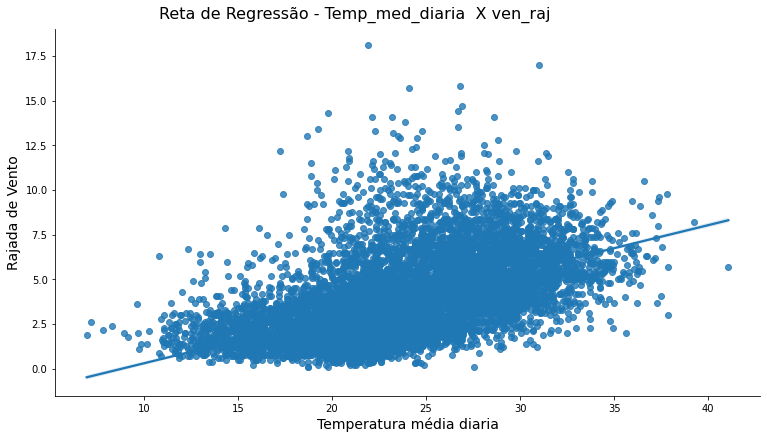

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="ven_raj", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X ven_raj', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média diaria", fontsize=14)
ax.set_ylabels("Rajada de Vento", fontsize=14)
ax

**Temperatura média diária X Umidade Média diária**
*   **Coeficiente de Correlação = -0.7 (Forte correlação - Inversamente proporcional)**

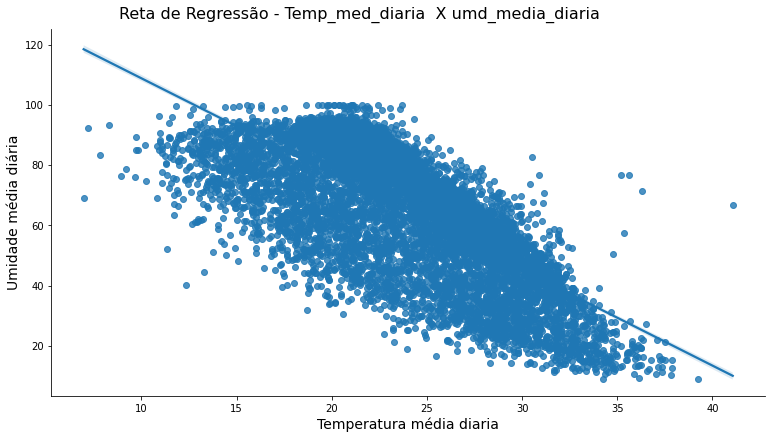

In [ ]:
ax = sn.lmplot(x="temp_med_diaria", y="umd_media_diaria", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Temp_med_diaria  X umd_media_diaria', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média diaria", fontsize=14)
ax.set_ylabels("Umidade média diária", fontsize=14)
ax

**Dif temperatura diária X Umidade Mínima**
*   **Coeficiente de Correlação = -0.5 (Correlação Moderada  - Inversamente proporcional)**

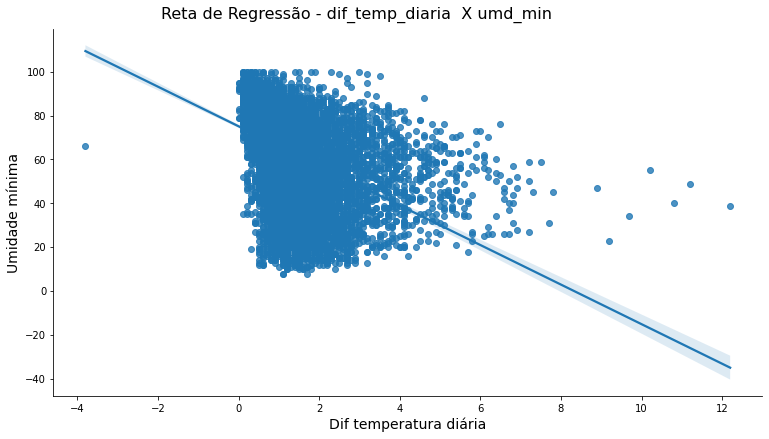

In [ ]:
ax = sn.lmplot(x="dif_temp_diaria", y="umd_min", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - dif_temp_diaria  X umd_min', fontsize=16, y=1.02)
ax.set_xlabels("Dif temperatura diária", fontsize=14)
ax.set_ylabels("Umidade mínima", fontsize=14)
ax

**Dif temperatura diária X Dif Umidade Diária**
*   **Coeficiente de Correlação = 0.8 (Forte correlação)**

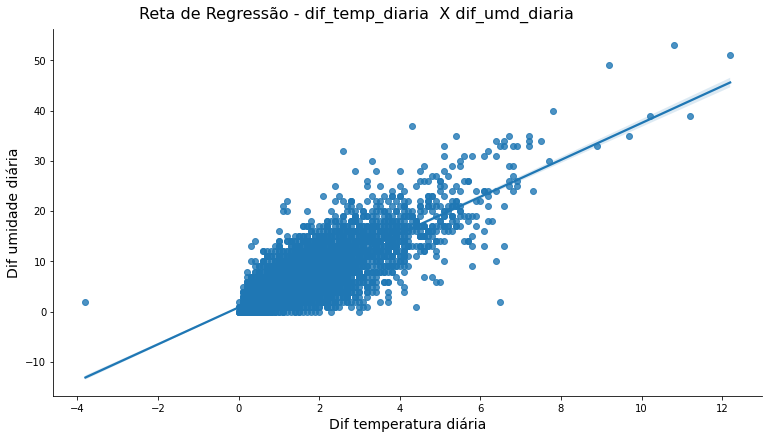

In [ ]:
ax = sn.lmplot(x="dif_temp_diaria", y="dif_umd_diaria", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - dif_temp_diaria  X dif_umd_diaria', fontsize=16, y=1.02)
ax.set_xlabels("Dif temperatura diária", fontsize=14)
ax.set_ylabels("Dif umidade diária", fontsize=14)
ax

**Umidade Média diária X Pto Orvalho Instantâneo**
*   **Coeficiente de Correlação = 0.7 (Forte correlação)**

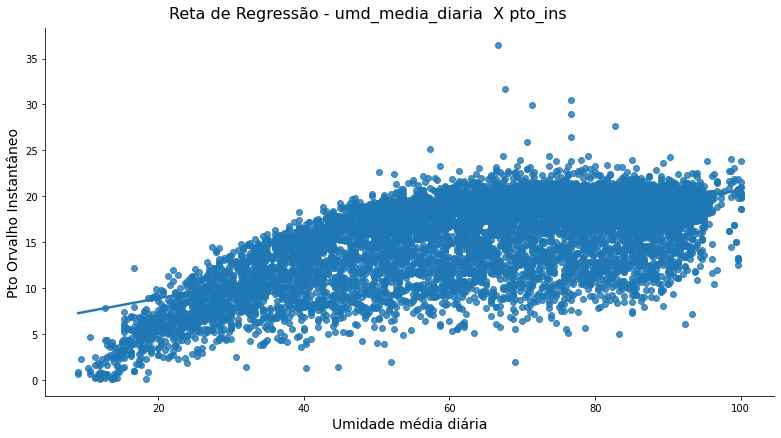

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="pto_ins", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X pto_ins', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Pto Orvalho Instantâneo", fontsize=14)
ax

**Umidade Média diária X Umidade mínima**
*   **Coeficiente de Correlação = 1 (Forte correlação)**

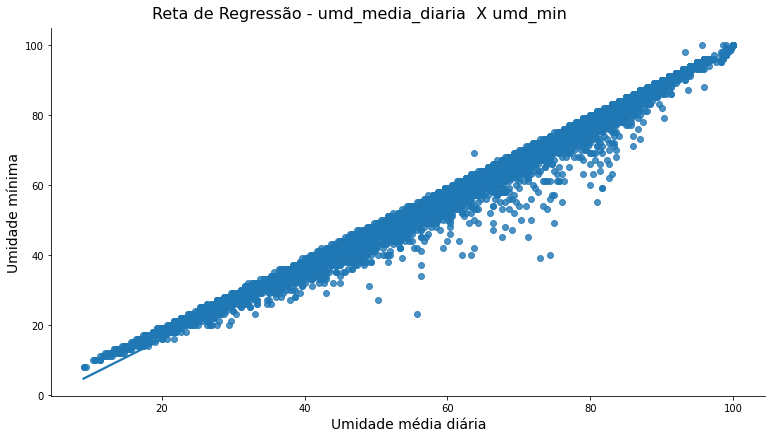

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="umd_min", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X umd_min', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Umidade mínima", fontsize=14)
ax

**Umidade Média diária X Umidade Máxima**
*   **Coeficiente de Correlação = 1 (Forte correlação)**

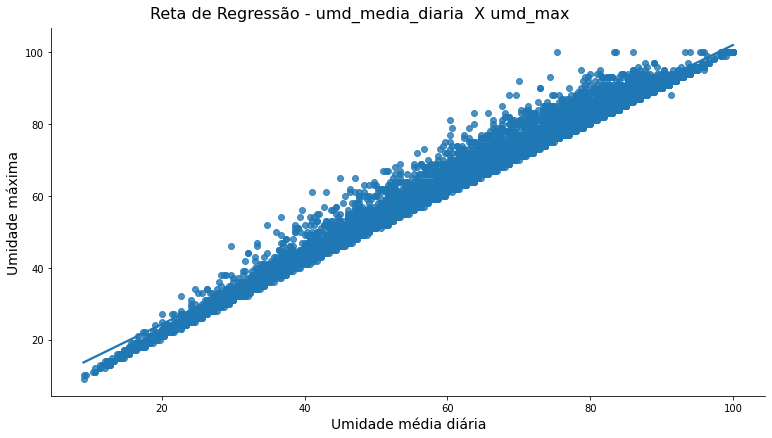

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="umd_max", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X umd_max', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Umidade máxima", fontsize=14)
ax

**Umidade Média diária X Temperatura máxima**
*   **Coeficiente de Correlação = -0.7 (Forte correlação - Inversamente Proporcional)**

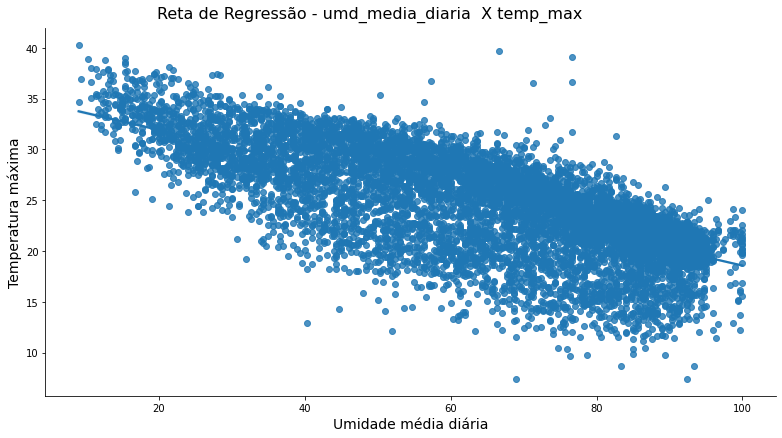

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="tem_max", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X temp_max', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Temperatura máxima", fontsize=14)
ax

**Umidade Média diária X Rajada de Vento**
*   **Coeficiente de Correlação = -0.5 (Correlação Moderada - Inversamente Proporcional)**

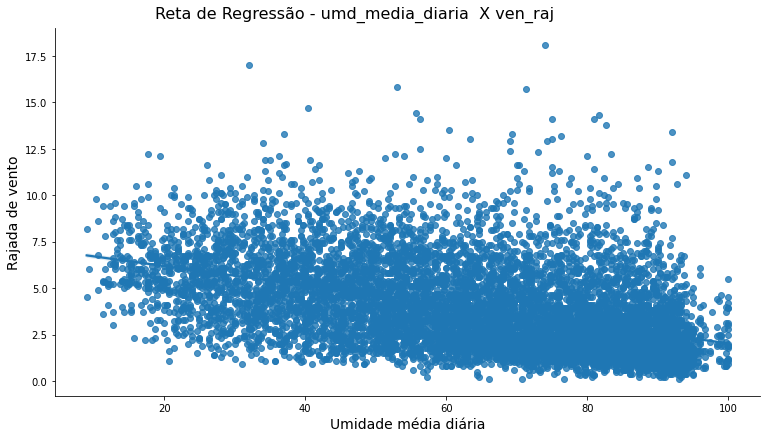

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="ven_raj", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X ven_raj', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Rajada de vento", fontsize=14)
ax

**Umidade Média diária X Temperatura Média diária**
*   **Coeficiente de Correlação = -0.7 (Forte Correlação - Inversamente Proporcional)**

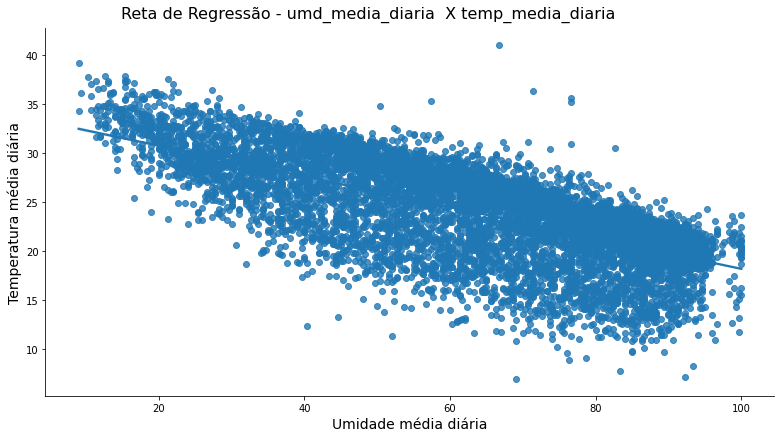

In [ ]:
ax = sn.lmplot(x="umd_media_diaria", y="temp_med_diaria", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - umd_media_diaria  X temp_media_diaria', fontsize=16, y=1.02)
ax.set_xlabels("Umidade média diária", fontsize=14)
ax.set_ylabels("Temperatura média diária", fontsize=14)
ax

**Dif Umidade Diária X Dif Temperatura Diária**
*   **Coeficiente de Correlação = 0.8 (Forte Correlação)**

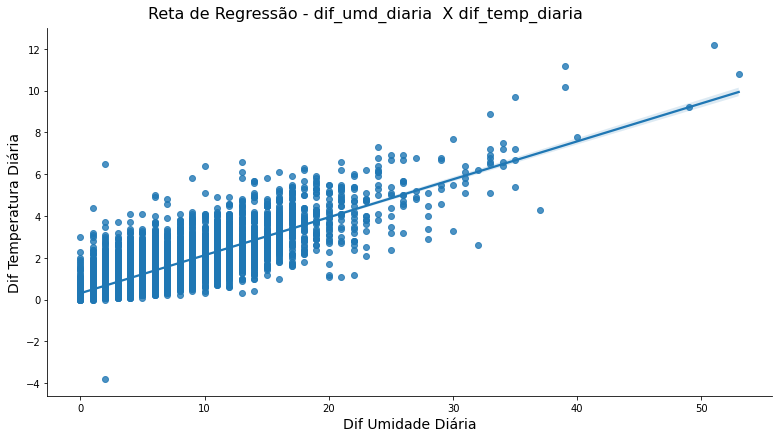

In [ ]:
ax = sn.lmplot(x="dif_umd_diaria", y="dif_temp_diaria", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - dif_umd_diaria  X dif_temp_diaria', fontsize=16, y=1.02)
ax.set_xlabels("Dif Umidade Diária", fontsize=14)
ax.set_ylabels("Dif Temperatura Diária", fontsize=14)
ax

**Dif Umidade Diária X Temperatura Máxima**
*   **Coeficiente de Correlação = 0.3 (Baixa Correlação)**

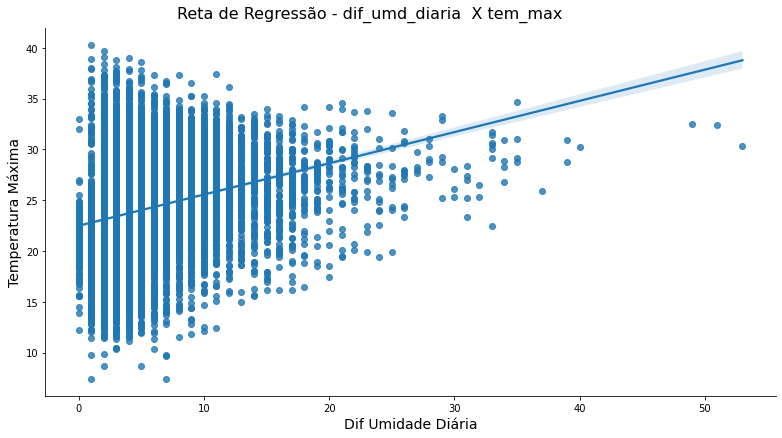

In [ ]:
ax = sn.lmplot(x="dif_umd_diaria", y="tem_max", data=test)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - dif_umd_diaria  X tem_max', fontsize=16, y=1.02)
ax.set_xlabels("Dif Umidade Diária", fontsize=14)
ax.set_ylabels("Temperatura Máxima", fontsize=14)
ax

#  Análise descritiva


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df['cidade'].unique()

In [ ]:
df.drop(df['cidade'], axis = 1)